In [1]:
!pip install librosa

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [3]:
scale_file = 'audio.wav'
scale, sr = librosa.load(scale_file)

In [4]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [5]:
S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
print(S_scale.shape)
print(type(S_scale[0][0]))

(1025, 706)
<class 'numpy.complex64'>


In [6]:
Y_scale = np.abs(S_scale) ** 2
print(Y_scale.shape)
print(type(Y_scale[0][0]))

(1025, 706)
<class 'numpy.float32'>


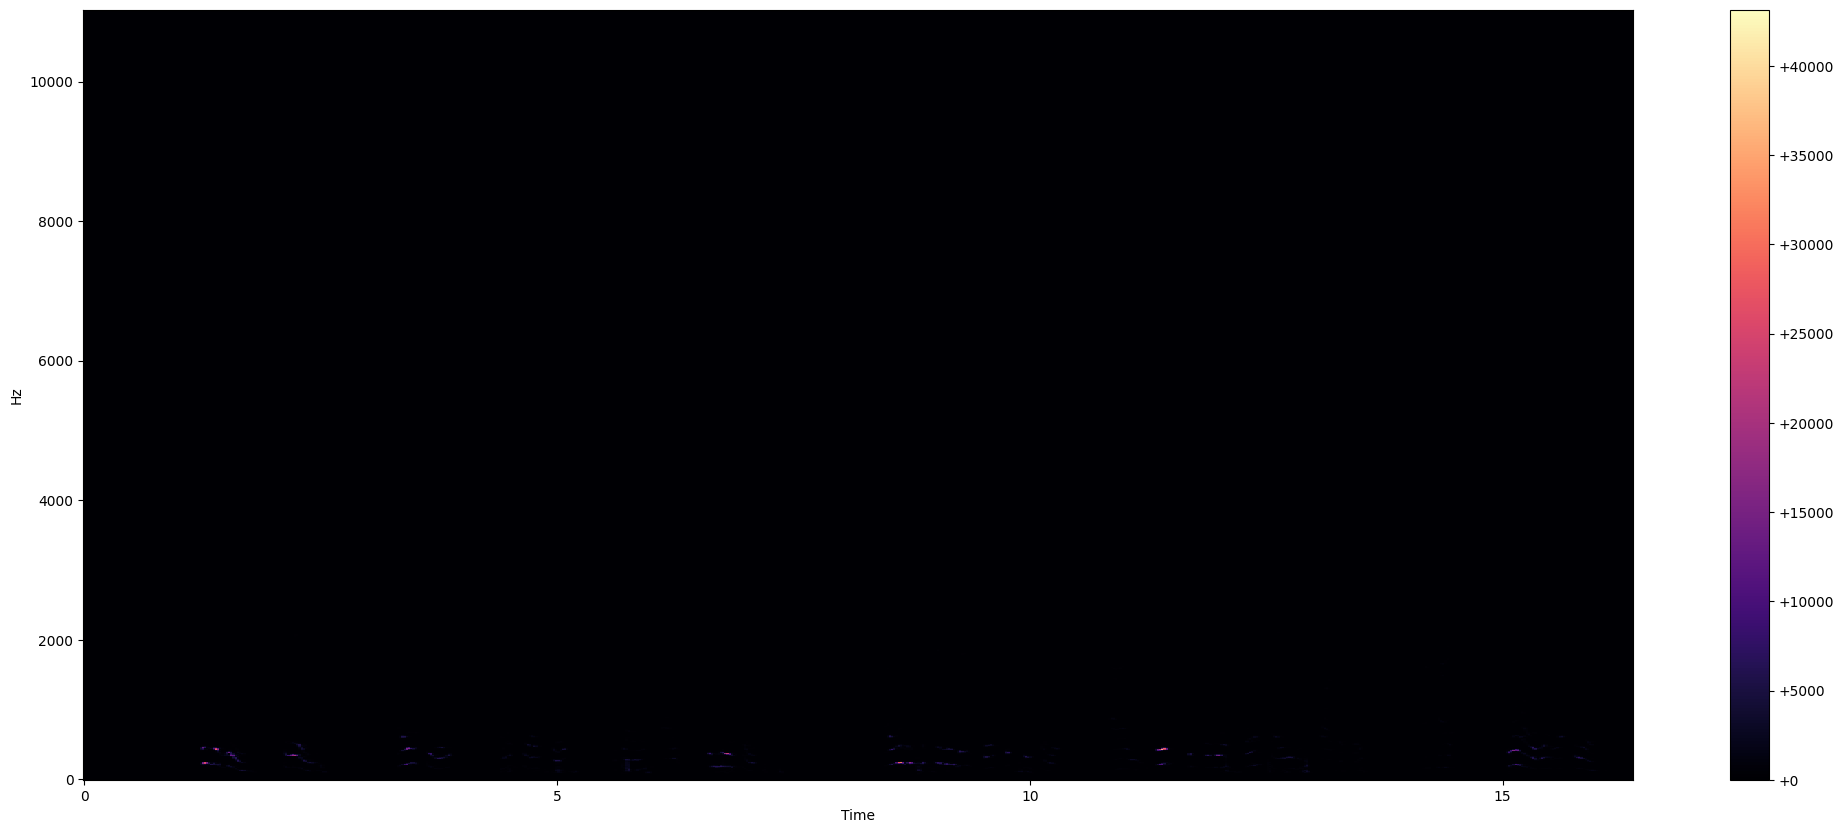

In [7]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(Y_scale, sr=sr, hop_length=HOP_SIZE, x_axis= 'time', y_axis='linear')
plt.colorbar(format='%+2.f')

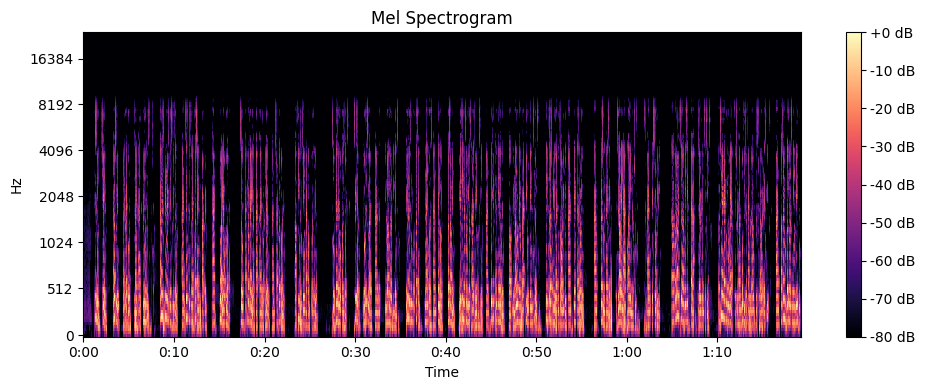

In [10]:
y, sr = librosa.load(scale_file, sr=None)

# Generate the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Convert to log scale (dB)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

S_dB_tensor = torch.tensor(S_dB).unsqueeze(0)

class Conv1DModel(nn.Module):
  def __init__(self):
    super(Conv1DModel, self).__init__()
    self.conv1 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=3, padding=1)
    self.conv2 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=3, padding=1)
    self.gelu = nn.GELU()

  def forward(self, x):
    x = self.conv1(x)
    x = self.gelu(x)
    x = self.conv2(x)
    x = self.gelu(x)
    return x

# Instantiate the model
model = Conv1DModel()

# Pass the Mel spectrogram through the model
output = model(S_dB_tensor)

# Print the output shape
print(f"Output shape: {output.shape}")
print(output)

Output shape: torch.Size([1, 32, 7424])
tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 1.0012e+01,  5.2508e+00,  5.9447e+00,  ...,  7.1197e+00,
          -1.6823e-01,  3.6578e+00],
         [ 2.1772e+01,  1.2066e+01,  1.7790e+01,  ...,  1.8839e+01,
           1.0896e+01,  0.0000e+00],
         ...,
         [-2.6224e-05, -1.5321e-01,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00, -1.8359e-02],
         [ 1.5111e-01,  4.9727e+00,  6.1654e+00,  ...,  7.2626e+00,
           3.0060e+00,  8.6639e+00],
         [ 1.4532e+01,  3.4929e+01,  3.1425e+01,  ...,  3.1801e+01,
           2.7417e+01,  1.2969e+01]]], grad_fn=<GeluBackward0>)
